In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import scaleogram as scg # install: https://github.com/alsauve/scaleogram 
import pywt

scg.set_default_wavelet('cmor1-1.5') # choose default wavelet function for the entire notebook
#scg.set_default_wavelet('cgau5') 
#scg.set_default_wavelet('cgau1')
#scg.set_default_wavelet('shan0.5-2')
#scg.set_default_wavelet('mexh')

Default wavelet function used to compute the transform: cmor1-1.5 ( Complex Morlet wavelets )


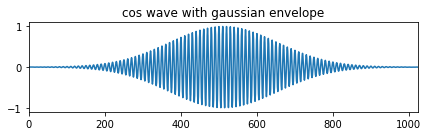

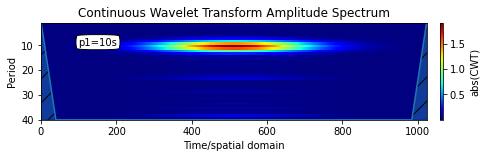

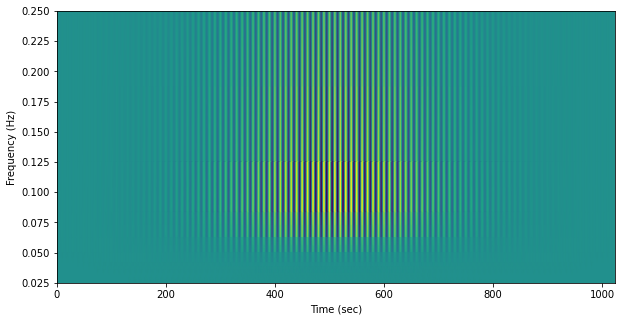

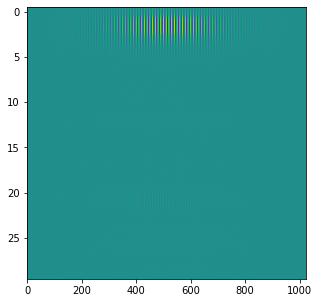

In [42]:
# let consider a timeline with 1 sample / second
ns   = 1024
time = np.arange(ns)

# and a range of scales to perform the transform
scales = scg.periods2scales( np.arange(1, 40) )

# and a periodic signal with varying amplitude
p1=10; periodic1 = np.cos(2*np.pi/p1*time) * np.exp(-((time-ns/2)/200)**2)



# plot the signal 
fig1, ax1 = plt.subplots(1, 1, figsize=(6.2,2));  
lines = ax1.plot(periodic1); 
ax1.set_xlim(0, len(time))
ax1.set_title("cos wave with gaussian envelope")
fig1.tight_layout()

# and the scaleogram
ax2 = scg.cws(periodic1, scales=scales, figsize=(6.9,2.3)); 
txt = ax2.annotate("p1=10s", xy=(100, 10), bbox=dict(boxstyle="round4", fc="w"))
plt.tight_layout()

print("Default wavelet function used to compute the transform:", scg.get_default_wavelet(), "(",
      pywt.ContinuousWavelet(scg.get_default_wavelet()).family_name, ")")


# Calculate continuous wavelet transform
coef, freqs = pywt.cwt(periodic1, np.arange(1, 11), 'mexh')

# Show w.r.t. time and frequency
plt.figure(figsize=(10, 5))
plt.pcolormesh(time, freqs, coef, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
#plt.yscale('log') # Set yscale
#plt.ylim([1, 100]) # Set ylim
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()



widths = np.arange(1, 31)
cwtmatr, freqs = pywt.cwt(periodic1, widths, 'mexh')
plt.figure(figsize=(5, 5))
plt.imshow(cwtmatr, aspect='auto')  
plt.show() 

Default wavelet function used to compute the transform: cmor1-1.5 ( Complex Morlet wavelets )


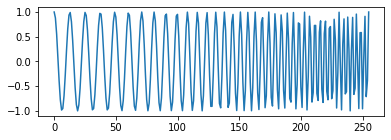

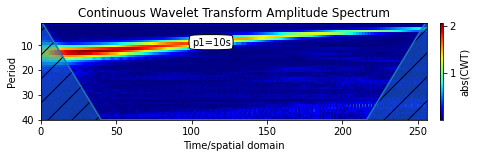

In [12]:
from scipy.signal import chirp, spectrogram
# Define signal
fs = 128.0
sampling_period = 1 / fs
t = np.linspace(0, 2, int(2 * fs))
x = chirp(t, 10, 2, 40, 'quadratic')


# plot the signal 
fig2, ax2 = plt.subplots(1, 1, figsize=(6.2,2));  
lines = ax2.plot(x); 
ax1.set_xlim(0, len(time))
ax1.set_title("cos wave with gaussian envelope")
fig1.tight_layout()

# and the scaleogram
ax2 = scg.cws(x, scales=scales, figsize=(6.9,2.3)); 
txt = ax2.annotate("p1=10s", xy=(100, 10), bbox=dict(boxstyle="round4", fc="w"))
plt.tight_layout()

print("Default wavelet function used to compute the transform:", scg.get_default_wavelet(), "(",
      pywt.ContinuousWavelet(scg.get_default_wavelet()).family_name, ")")


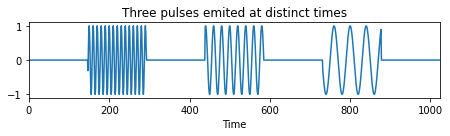

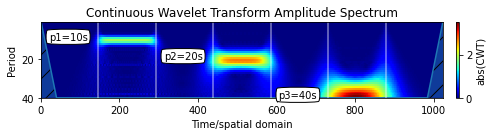

In [3]:
pulses = np.zeros(ns, dtype=np.float32)
steps  = np.linspace(0, ns, 8)
periods = [10, 20, 40]
for i in range(0,3):
    step_mask = (time > steps[i*2+1]) & (time < steps[i*2+2])
    pulses += np.cos(2*np.pi/periods[i]*time) * step_mask

# plot the pulses
fig1, ax1 = plt.subplots(1, 1, figsize=(6.5,2));  
lines = ax1.plot(pulses); ax1.set_xlim(0, len(time)); 
ax1.set_title("Three pulses emited at distinct times"); ax1.set_xlabel("Time")
fig1.tight_layout()

# and the scaleogram
ax2 = scg.cws(pulses, scales=scales, figsize=(7,2))

# add fancy helpers
for i in range(0, 3):
    txt = ax2.annotate("p%d=%ds"%(i+1,periods[i]), xy=(steps[i*2]+20, periods[i]), 
                       bbox=dict(boxstyle="round4", fc="w"))
    ax2.plot(steps[i*2+1]*np.ones(2), ax2.get_ylim(), '-w', alpha=0.5)
    ax2.plot(steps[i*2+2]*np.ones(2),   ax2.get_ylim(), '-w', alpha=0.5)
plt.tight_layout()

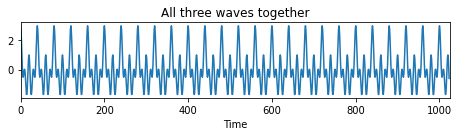

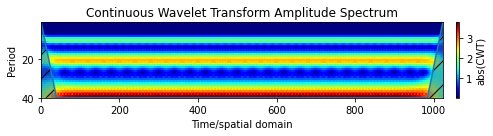

In [4]:
# generate a signal with the three waves together
allwaves = np.zeros(ns, dtype=np.float32)
for i in range(0,3):
    allwaves += np.cos(2*np.pi/periods[i]*time)

# plot the waves
fig1, ax1 = plt.subplots(1, 1, figsize=(6.5,2));  
lines = ax1.plot(allwaves); ax1.set_title("All three waves together") 
ax1.set_xlim(0, len(time)); ax1.set_xlabel("Time")
fig1.tight_layout()

# and the scaleogram
ax2 = scg.cws(allwaves, scales=scales, figsize=(7,2))
plt.tight_layout()

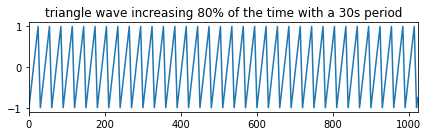

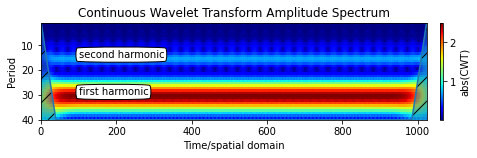

In [5]:
# build an asymetric triangle wave increasiong 80% of the time
import scipy.signal
ptri    = 30.0 # period in samples
raising = 0.8  # fraction of the period raising
triangle = scipy.signal.sawtooth(time/ptri*2*np.pi, raising)

# plot the signal 
fig1, ax1 = plt.subplots(1, 1, figsize=(6.2,2));  
lines = ax1.plot(triangle); 
ax1.set_xlim(0, len(time))
ax1.set_title("triangle wave increasing 80% of the time with a 30s period")
fig1.tight_layout()

# and the scaleogram
ax2 = scg.cws(triangle, scales=scales, figsize=(6.9,2.3)); 
txt = ax2.annotate("first harmonic", xy=(100, 30), bbox=dict(boxstyle="round4", fc="w"))
txt = ax2.annotate("second harmonic", xy=(100, 15), bbox=dict(boxstyle="round4", fc="w"))
plt.tight_layout()

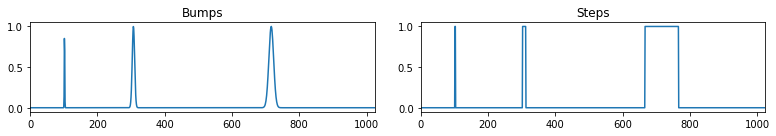

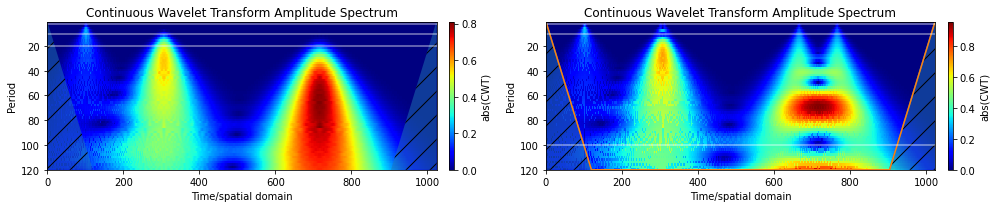

In [6]:
# several gaussian bumps given sigma
s1=1; s2=5; s3=10
events = [ns*0.1, ns*0.3, ns*0.7]
bumps = np.exp(-((time-events[0])/s1)**2) + np.exp(-((time-events[1])/s2)**2) + \
        np.exp(-((time-events[2])/s3)**2) 

# several steps given half-hidth
w1=1; w2=5; w3= 50
steps = ((time > events[0]-w1) & (time < events[0]+w1)) + \
    ((time > events[1]-w2) & (time < events[1]+w2)) + \
    ((time > events[2]-w3) & (time < events[2]+w3))

# plot the pulses
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 2)); 
ax1.set_title("Bumps"); ax2.set_title("Steps")
lines = ax1.plot(bumps); ax1.set_xlim(0, len(time))
lines = ax2.plot(steps); ax2.set_xlim(0, len(time))
fig1.tight_layout()

# and the scaleogram
scales_bumps = scg.periods2scales(np.arange(1, 120, 2) )
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(14,3));  
ax3 = scg.cws(bumps, scales=scales_bumps, ax=ax3)
ax4 = scg.cws(steps, scales=scales_bumps, ax=ax4)
for bmpw, stepw in [(2*s1, 2*w1), (2*s2,2*w2), (2*s3, 2*w3)]:
    ax3.plot(ax3.get_xlim(), bmpw*np.ones(2), 'w-', alpha=0.5)
    ax4.plot(ax4.get_xlim(), stepw*np.ones(2), 'w-', alpha=0.5)
fig2.tight_layout()

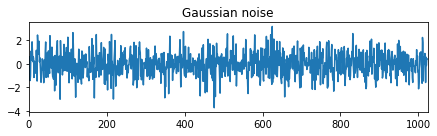

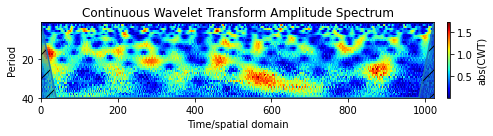

In [7]:
noise = np.random.randn(ns)

# plot the noise
fig1, ax1 = plt.subplots(1, 1, figsize=(6.2,2));  
ax1.set_title("Gaussian noise")
lines = ax1.plot(time, noise) 
ax1.set_xlim(0, ns)
fig1.tight_layout()

# and the scaleogram of noise
ax2 = scg.cws(noise, scales=scales, figsize=(7,2))
plt.tight_layout()